# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.int)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.int)

In [3]:
def slope(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x*y)
    num = x_mean * y_mean - xy_mean
    denom = (x_mean**2) - (np.mean(x**2))
    return num/denom

In [4]:
def intercept(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    m = slope(x, y)
    return y_mean - (m*x_mean)

In [5]:
def prediction(x, y):
    b = slope(x, y)
    a = intercept(x, y)
    return np.array([b*x_i + a for x_i in x])

In [6]:
def sq_err(y, y_predicted):
#     error = []
#     for i, j in range(len(list(zip(y, y_predicted)))):
#         error.append((a-b)**2)
#     return np.sum([(yi-ypi)**2 for yi, ypi in np.array(list(zip(y, y_predicted)))])
    return np.sum((y-y_predicted)**2)

In [7]:
def r_squared(y, y_predicted):
    sse = sq_err(y, y_predicted)
    real_mean = np.full(shape=len(y), fill_value=np.mean(y))
    sst = sq_err(y, np.mean(y))
    
    return 1 - (sse/sst)

In [8]:
x_stats = stats.describe(X)
y_stats = stats.describe(Y)
xy_stats = stats.describe(X*Y)
print(x_stats)
print(y_stats)
print(xy_stats)

DescribeResult(nobs=10, minmax=(1, 10), mean=5.5, variance=9.166666666666666, skewness=0.0, kurtosis=-1.2242424242424244)
DescribeResult(nobs=10, minmax=(7, 12), mean=9.4, variance=2.933333333333333, skewness=-0.10071121989218201, kurtosis=-1.1446280991735531)
DescribeResult(nobs=10, minmax=(7, 120), mean=56.3, variance=1432.2333333333333, skewness=0.28477170913813926, kurtosis=-1.121156077524272)


In [9]:
m = slope(X, Y)
b = intercept(X, Y)
Y_predicted = prediction(X, Y)
X_predicted = prediction(Y, Y_predicted)
e = sq_err(Y, Y_predicted)
R_squared = r_squared(Y, Y_predicted)
print('Slope: ', m)
print('Y-Intercept: ', b)
print('Y-Predicted: ', Y_predicted)
print('X-Predicted: ', X_predicted)
print('Error: ', e)
print('R^2: ', R_squared)

Slope:  0.5575757575757568
Y-Intercept:  6.3333333333333375
Y-Predicted:  [ 6.89090909  7.44848485  8.00606061  8.56363636  9.12121212  9.67878788
 10.23636364 10.79393939 11.35151515 11.90909091]
X-Predicted:  [ 7.06831956  7.06831956  8.03985308  9.01138659  9.01138659  9.98292011
  9.98292011 10.95445363 10.95445363 11.92598714]
Error:  0.7515151515151492
R^2:  0.9715335169880626


In [10]:
print(f'Y = {round(m, 2)} * X + {round(b, 2)}')

Y = 0.56 * X + 6.33


No handles with labels found to put in legend.


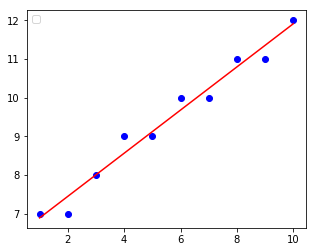

In [11]:
fig = plt.figure(figsize=(5, 4))
fit = np.polyfit(X, Y, 1)
fit_lr = np.poly1d(fit) 

plt.plot(X, Y, 'bo', X, fit_lr(X), 'r-')
plt.legend()

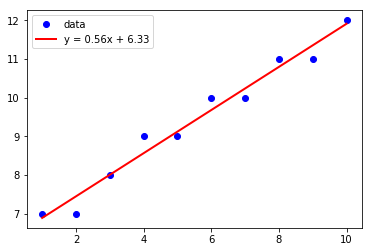

In [12]:
def fit(x):
    return b + m * x
xfit = np.array([np.min(X), np.max(X)])
plt.plot(X, Y, 'bo', label='data')
plt.plot(xfit, fit(xfit), 'r-', lw=2, label= f'y = {round(m, 2)}x + {round(b, 2)}')
plt.legend()

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


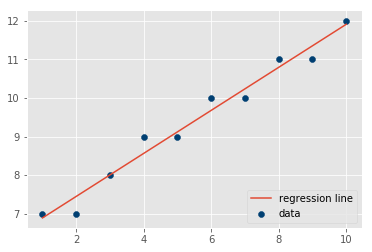

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.

In [13]:
# Make prediction using given value and visualize on the scatter plot
x = 4.5
y = b + m*x
round(y, 2)

8.84

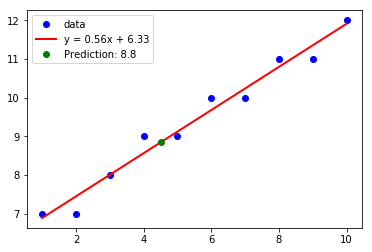

In [14]:
xfit = np.array([np.min(X), np.max(X)])
plt.plot(X, Y, 'bo', label='data')
plt.plot(xfit, fit(xfit), 'r-', lw=2, label= f'y = {round(m, 2)}x + {round(b, 2)}')
plt.plot(x, y, 'go', label=f'Prediction: {round(y, 1)}')
plt.legend()

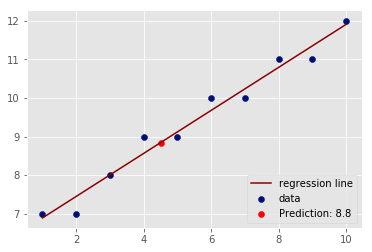

## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

In [15]:
import pandas as pd
df = pd.read_csv('heightWeight.csv')
df.head()

,height,Weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [16]:
M = slope(df['height'], df['Weight'])
B = intercept(df['height'], df['Weight'])
df['weight_predicted'] = prediction(df['height'], df['Weight'])
df['height_predicted'] = prediction(df['Weight'], df['weight_predicted'])
print(M, B)
df.head()

5.539019232705614 -204.48343570637024


,height,Weight,weight_predicted,height_predicted
0,68,165,172.169872,165.035752
1,71,201,188.786930,199.426909
2,61,140,133.396737,141.153004
3,69,170,177.708891,169.812302
4,71,192,188.786930,190.829120


In [19]:
e = sq_err(df['height'], df['height_predicted'])
R_squared = r_squared(df['height'], df['height_predicted'])
print(e, R_squared)

205617.3179255894 -413.0918697524709


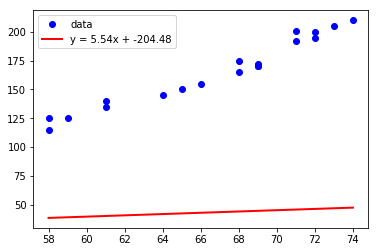

In [22]:
height_fit = np.array([np.min(df['height']), np.max(df['height'])])
plt.plot(df['height'], df['Weight'], 'bo', label='data')
plt.plot(height_fit, fit(height_fit), 'r-', lw=2, label= f'y = {round(M, 2)}x + {round(B, 2)}')
plt.legend()

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 